## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation, KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import src.functions_cluster as cl

## Load data

In [7]:
data = pd.read_csv("../Output/sp_climate.csv", sep= ";")

In [8]:
data.head()

,community,min_temp,max_temp,elevation,isothermality,mean_temp,precip,seasonal_temp,long,lat,species
0,Andalucia,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245,-1.856,37.237,Hemorrhois hippocrepis
1,Andalucia,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245,-2.256,36.797,Chamaeleo chamaeleon
2,Andalucia,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245,-2.294,36.835,Chamaeleo chamaeleon
3,Andalucia,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245,-2.286,36.820,Chamaeleo chamaeleon
4,Andalucia,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245,-2.224,36.763,Chamaeleo chamaeleon


In [9]:
X = data[['lat', 'long', 'species', 'community','min_temp','max_temp','elevation', 'isothermality', 'mean_temp', 'precip', 'seasonal_temp']]

In [10]:
X.head()

,lat,long,species,community,min_temp,max_temp,elevation,isothermality,mean_temp,precip,seasonal_temp
0,37.237,-1.856,Hemorrhois hippocrepis,Andalucia,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245
1,36.797,-2.256,Chamaeleo chamaeleon,Andalucia,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245
2,36.835,-2.294,Chamaeleo chamaeleon,Andalucia,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245
3,36.820,-2.286,Chamaeleo chamaeleon,Andalucia,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245
4,36.763,-2.224,Chamaeleo chamaeleon,Andalucia,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245


As we have two categorical variables, I will convert them to dummies to be able to perform the analyses

In [11]:
 X = pd.get_dummies(X, columns=['species', "community"])

In [12]:
X.head()

,lat,long,min_temp,max_temp,elevation,isothermality,mean_temp,precip,seasonal_temp,species_Alectoris barbara,...,community_Comunitat Valenciana,community_Euskadi,community_Extremadura,community_Galicia,community_Illes Balears,community_Islas Canarias,community_La Rioja,community_Murcia,community_Navarra - Nafarroa,community_Norte
0,37.237,-1.856,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245,0,...,0,0,0,0,0,0,0,0,0,0
1,36.797,-2.256,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245,0,...,0,0,0,0,0,0,0,0,0,0
2,36.835,-2.294,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245,0,...,0,0,0,0,0,0,0,0,0,0
3,36.820,-2.286,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245,0,...,0,0,0,0,0,0,0,0,0,0
4,36.763,-2.224,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245,0,...,0,0,0,0,0,0,0,0,0,0


## k-means

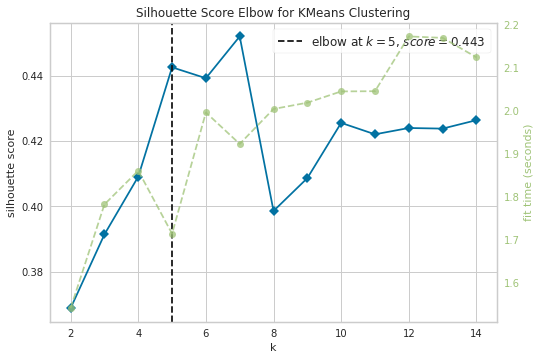

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [8]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette')
visualizer.fit(X)        
visualizer.show()

The best model is the one with 5 clusters

In [11]:
y_predkm, kmeans = cl.cv_silhouette_scorer(KMeans, X)

In [11]:
y_predag, agglomerative = cl.cv_silhouette_scorer(AgglomerativeClustering, X)

In [12]:
y_predb, DBSCAN = cl.cv_silhouette_scorer(DBSCAN, X)

In [13]:
kmeans, agglomerative, DBSCAN

("The silhouette_score for a '<class 'sklearn.cluster._kmeans.KMeans'>' is: '0.44252193179029536'",
 "The silhouette_score for a '<class 'sklearn.cluster._agglomerative.AgglomerativeClustering'>' is: '0.41720860458980247'",
 "The silhouette_score for a '<class 'sklearn.cluster._dbscan.DBSCAN'>' is: '0.501122247933251'")

In [15]:
y_predkm

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [15]:
model = KMeans(n_clusters = 5)
model.fit(X)
y_predkm = model.predict(X)


In [16]:
data_kmeans = pd.DataFrame(X, columns = X.columns)
data_kmeans["pred_cluster"] = y_predkm
data_kmeans

,lat,long,min_temp,max_temp,elevation,isothermality,mean_temp,precip,seasonal_temp,species_Alectoris barbara,...,community_Euskadi,community_Extremadura,community_Galicia,community_Illes Balears,community_Islas Canarias,community_La Rioja,community_Murcia,community_Navarra - Nafarroa,community_Norte,pred_cluster
0,37.237,-1.856,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245,0,...,0,0,0,0,0,0,0,0,0,1
1,36.797,-2.256,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245,0,...,0,0,0,0,0,0,0,0,0,1
2,36.835,-2.294,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245,0,...,0,0,0,0,0,0,0,0,0,1
3,36.820,-2.286,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245,0,...,0,0,0,0,0,0,0,0,0,1
4,36.763,-2.224,0.260258,1.550703,-0.299635,0.386286,0.954123,0.985189,0.481245,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,43.387,-4.390,0.124076,-1.132669,-0.237746,0.268741,-0.375814,0.558902,-0.755833,0,...,0,0,0,0,0,0,0,0,1,2
9682,43.434,-4.033,0.124076,-1.132669,-0.237746,0.268741,-0.375814,0.558902,-0.755833,0,...,0,0,0,0,0,0,0,0,1,2
9683,43.434,-4.033,0.124076,-1.132669,-0.237746,0.268741,-0.375814,0.558902,-0.755833,0,...,0,0,0,0,0,0,0,0,1,2
9684,43.434,-4.033,0.124076,-1.132669,-0.237746,0.268741,-0.375814,0.558902,-0.755833,0,...,0,0,0,0,0,0,0,0,1,2


In [17]:
pca = PCA(2)
data_transformed = pd.DataFrame(pca.fit_transform(data_kmeans), columns=["PC1","PC2"])

/home/anagarcia/anaconda3/envs/final/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


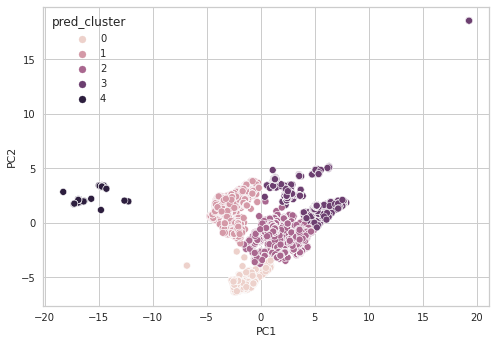

In [18]:
pca_plot = sns.scatterplot(data_transformed["PC1"],data_transformed["PC2"], hue= data_kmeans["pred_cluster"])

In [21]:
pca_plot.figure.savefig("PCA.png")

## Revert the dummies and get the clusters

In [66]:
df1 = cl.cleaning_dataset_dummies(data_kmeans)

## Save the model for future predictions

In [88]:
import joblib

In [95]:
data = pd.read_csv("sp_climate.csv")
X = data[['lat', 'long', 'species', 'community','min_temp','max_temp','elevation', 'isothermality', 'mean_temp', 'precip', 'seasonal_temp']]
X = pd.get_dummies(X, columns=['species', "community"])
model = KMeans(n_clusters = 5, random_state = 100, copy_x=True, init='k-means++', max_iter=300)


In [96]:
model.fit(X)

KMeans(n_clusters=5, random_state=100)

In [97]:
joblib.dump(model, 'model.pkl')  
model_loaded = joblib.load('model.pkl')

model_loaded

KMeans(n_clusters=5, random_state=100)

In [ ]:
#Para predecir con nuevos valores
model_loaded.predict([0,0,0,0])

[cosas interesantes](https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/)